# Assignment 4

In this assignment, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

__Exercise 1.1.__ Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [1]:
import requests
# In terminal: conda install requests
import requests_cache
# In terminal: pip install requests_cache

# Set up a cache for requests.
requests_cache.install_cache("cache")

def nbd_search(term):
    '''
    Search nbd database and return a list.
    '''
    url = 'https://api.nal.usda.gov/ndb/search'
    response = requests.get(url, params = {
        "q": term,
        "api_key": "GjFg37eA4Mx5ddsmRa0CdENRv8cUwbAs8SIXkDCk",
        "format": "json"
    })
    result = response.json()
    if 'errors' in result.keys():
        return(list())
    
    return result['list']['item']
nbd_search("quail eggs")

[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]

__Exercise 1.2.__ Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

In [2]:
import pandas as pd
import re
#Read in fresh csv and extract foodNames
fresh = pd.read_csv('fresh.csv')

In [3]:
foodNames = fresh['food'].str.replace('_', ' ')
foodNames = foodNames.drop_duplicates()

#Find all raw food
foodDF = [pd.DataFrame(nbd_search(name)) for name in foodNames + ', raw']

result = pd.concat(foodDF)
#Locate only Fruit and Veggies
result = result.loc[result['group'].isin(['Fruits and Fruit Juices', 'Vegetables and Vegetable Products'])]
result = result.drop_duplicates(subset = ['group','name','ndbno'])

#Convert all names to lower case
result['name'] = result['name'].str.lower()

In [4]:
def singleFoodSearch(searchName):
    '''
    Function taking a search term for all the food with a single word and return an ndbno number. 
    '''
    #Search for food name and raw element with any item in between.
    pattern = r'('+searchName+')(:?[a-z]*)(?:[(a-z )]?(, )?)*(raw)'
    
    #Find the pattern in food names
    search = result[result['name'].str.contains(pattern)][["name","ndbno"]]
    #Add to final results for values only returning 1 search result.
    if len(search) == 1: 
        return([item , search['ndbno'].values[0], search['name'].values[0]])

    #When more than one search result come up, take the item that contains all locations, else take the first result.
    #Since first result is the most relevant.
    elif len(search) > 1:
        ifAll = search['name'].str.contains('all')
        if sum(ifAll) >= 1:
            return([item,search[ifAll].values[0][1], search['name'].values[0]])
        else: 
            return([item, search['ndbno'].values[0], search['name'].values[0]])
    else:
        return('')


#List to store the search results
df = []
#For each name in the food list
food = fresh["food"]
food = food.drop_duplicates()
for item in food:
    #Replace all the _ in the name of food
    searchName = item.replace('_',' ')
    
    search = singleFoodSearch(searchName)
    if len(search) != 0:
        df.append(search)
    else: 
        if any(x in searchName for x in ['es','s']):
            searchName = re.sub(r"(s|es)$", "", searchName)
        search = singleFoodSearch(searchName)

        if len(search) != 0:
            df.append(search)
            #For searches that cannot be found 
        else :
            #Look at only two word searches
            if len(item.split("_")) != 1 :
                #The two terms
                a, b = item.split("_")
                #Check if result can be located by the second search term
                tmp = result[result['name'].str.contains(b)]
                #Single result, add to final results
                if(len(tmp) == 1):
                    df.append([item, tmp['ndbno'].values[0],  tmp['name'].values[0]])
                #When more than 1 result show up
                else:
                    #Look for the result that also contain the other term and get the ndbno values
                    val = tmp[tmp['name'].str.contains(a)]['ndbno'].values
                    #If no result show up for using the second search term, use the first search term instead.
                    if len(val) == 0:
                        tmp = result[result['name'].str.contains(a)]
                        #Single result add, more than one result take the first result that contain the left out term.
                        if(len(tmp) == 1):
                            df.append([item, tmp['ndbno'].values[0], tmp['name'].values[0]])
                        else:
                            df.append([item, tmp[tmp['name'].str.contains(b)]['ndbno'].values[0],  tmp[tmp['name'].str.contains(b)]['name'].values[0]])
                    #Add the first result that contain the leftout term.
                    else:
                        df.append([item, val[0],  tmp[tmp['name'].str.contains(a)]['name'].values[0]])
    
ndbnoDF = pd.DataFrame(df,columns=["food", 'ndbno','search result'])
ndbnoDF

/home/kavi/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


,food,ndbno,search result
0,watermelon,09326,"watermelon, raw"
1,cantaloupe,09181,"melons, cantaloupe, raw"
2,tangerines,09218,"tangerines, (mandarin oranges), raw"
3,strawberries,09316,"strawberries, raw"
4,plums,09279,"plums, raw"
5,oranges,09200,"tangerines, (mandarin oranges), raw"
6,raspberries,09302,"raspberries, raw"
7,pomegranate,09286,"pomegranates, raw"
8,pineapple,09266,"pineapple, raw, all varieties"
9,apricots,09021,"apricots, raw"


I was able to extract 46/48 of the food in the file with the exception of the duplicated cucumbers and cabbage that has more specific description in the Fresh column. The ndbno number should be mostly accurate as can be seen by the search result name returned and the search item. 

The general strategy is used the food names from the original file and perform a search using the database with a ', raw' added to the term. From the search results returned, I then extracted the items in fruits and vegetables. After that, I converted all the fresh food names to lower case since the returned results in API are in lower case.

Then I loop through each fresh food item. First remove the underscore from the food name. Then pass the food name to the function call singleFoodSearch which returns an nbdno number if search result only has one value else select from the list of search results the result that contained 'all' (to be general). If result doesn't the term 'all', just take the top result, since that one should be most relevant. 

Next, if the singleFoodSearch cannot locate the item, then we check if there are es or s in the fresh food name (to solve cases like mangoes and cucumbers). After removing those trailing es or s, we perform single food search again. To take care of the cases where we have two words in the fresh food name, we split the two words and perform a search on each of them. Starting with the second word. From the second word returned results (if there is any) we take the one that contained the first word. If the second word returned results is empty, we perform search using the first word and then search in the returne results the second word. 

__Exercise 1.3.__ Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [5]:
def ndb_report(nbdnum):
    url = 'https://api.nal.usda.gov/ndb/V2/reports'
    response = requests.get(url, params = {
        "ndbno": nbdnum,
        "api_key": "GjFg37eA4Mx5ddsmRa0CdENRv8cUwbAs8SIXkDCk",
        "format": "json"
    })
    result = response.json()
    if 'errors' in result.keys():
        return(list())
    
    return result['foods'][0]['food']['nutrients']
ndb_report('09279')

[{u'group': u'Proximates',
  u'measures': [{u'eqv': 165.0,
    u'eunit': u'g',
    u'label': u'cup, sliced',
    u'qty': 1.0,
    u'value': u'143.93'},
   {u'eqv': 66.0,
    u'eunit': u'g',
    u'label': u'fruit (2-1/8" dia)',
    u'qty': 1.0,
    u'value': u'57.57'},
   {u'eqv': 151.0,
    u'eunit': u'g',
    u'label': u'NLEA serving',
    u'qty': 1.0,
    u'value': u'131.72'}],
  u'name': u'Water',
  u'nutrient_id': u'255',
  u'unit': u'g',
  u'value': u'87.23'},
 {u'group': u'Proximates',
  u'measures': [{u'eqv': 165.0,
    u'eunit': u'g',
    u'label': u'cup, sliced',
    u'qty': 1.0,
    u'value': u'76'},
   {u'eqv': 66.0,
    u'eunit': u'g',
    u'label': u'fruit (2-1/8" dia)',
    u'qty': 1.0,
    u'value': u'30'},
   {u'eqv': 151.0,
    u'eunit': u'g',
    u'label': u'NLEA serving',
    u'qty': 1.0,
    u'value': u'69'}],
  u'name': u'Energy',
  u'nutrient_id': u'208',
  u'unit': u'kcal',
  u'value': u'46'},
 {u'group': u'Proximates',
  u'measures': [{u'eqv': 165.0,
    u'eunit

__Exercise 1.4.__ Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

In [6]:
values = [ndb_report(ndbno)[1]['value'] for ndbno in ndbnoDF["ndbno"]]
ndbnoDF.insert(2, "nutrition",values)

In [7]:
finalDF = pd.merge(fresh, ndbnoDF, how = 'inner', on = "food")

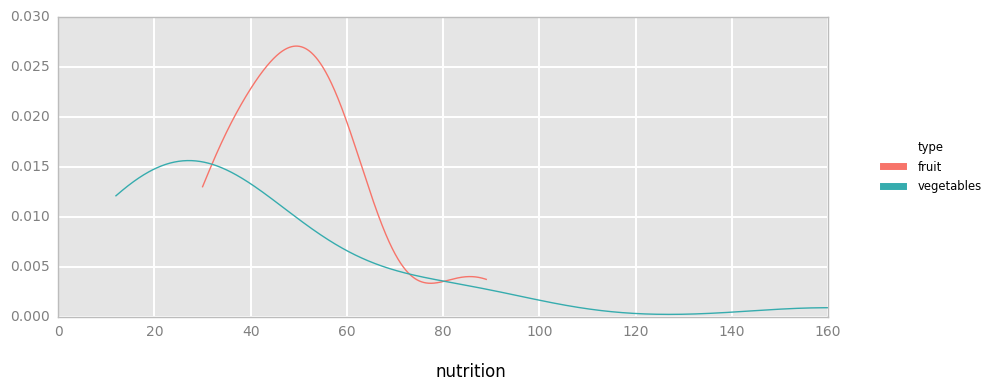

<ggplot: (8742280588637)>


In [8]:
from ggplot import *
df = finalDF.ix[:,["type","price_per_cup","nutrition"]]
df["nutrition"] = df["nutrition"].astype(float)
print(ggplot(df, aes(x = "nutrition", color = "type")) + geom_density() + theme(plot_margin = dict(right = .5, top=.5)))

From the density plot comparing the nutrition in terms of energy between fruit and vegetables, we see that fruits tend to have higher kilocalories. There is an outlier in vegetable due to avocado being considered as a vegetable instead of fruit. 

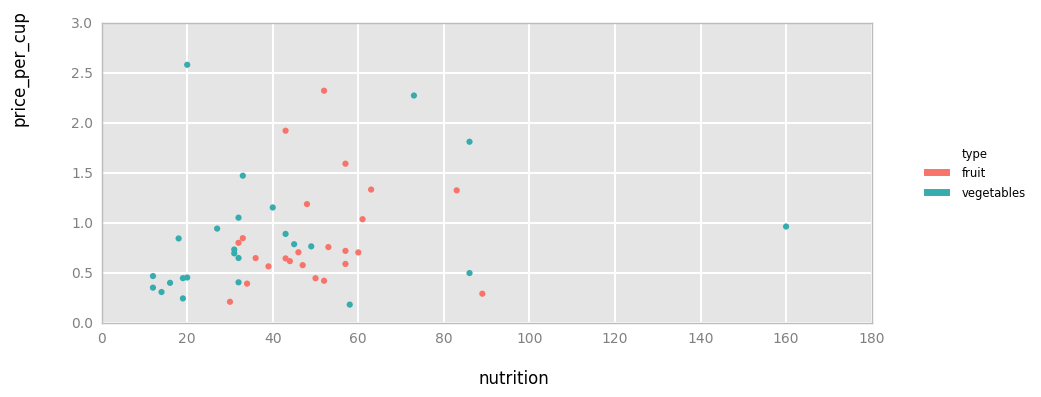

<ggplot: (8742280353693)>


In [9]:
df = finalDF.ix[:,["type","price_per_cup","food","nutrition"]]
df["nutrition"] = df["nutrition"].astype(float)
tmp = pd.concat([df["food"], df["nutrition"].astype(float)/df["price_per_cup"]], axis = 1, keys= ["food", "nutrition_per_price_per_cup"])
print(ggplot(df, aes(x = "nutrition", y = "price_per_cup", color = "type" )) + geom_point() + theme(plot_margin = dict(right = .5, top=.5)))

From the scatter plot, we see that higher nutrition (energy) does not necessariliy mean more expensive per cup. 

In [10]:
#Find top 5 food
tmp.sort("nutrition_per_price_per_cup", ascending = False).head(5)

/home/kavi/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,food,nutrition_per_price_per_cup
31,potatoes,315.187704
14,bananas,303.790443
38,sweet_potatoes,172.206545
42,avocados,165.822653
0,watermelon,141.487413


Using the criteria of nutrition (kilocalories for energy) divided by price_per_cup (incoporates price_per_lb, yield, lb_per_cup), we have that potatoes and bananas provides the most energy for the price and yield combination. Although avocados provide a lot more energy, it's higher price makes it less favorable. 